In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


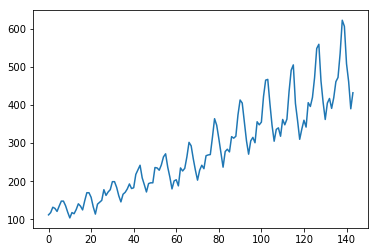

In [5]:
data = pd.read_csv('international-airline-passengers.csv', usecols=[1], header=0)
data.head()
plt.plot(data)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [10]:
np.random.seed(23)

In [11]:
data = data.values.astype('float')

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)
dataset[:10]

array([[ 0.01544402],
       [ 0.02702703],
       [ 0.05405405],
       [ 0.04826255],
       [ 0.03281853],
       [ 0.05984556],
       [ 0.08494208],
       [ 0.08494208],
       [ 0.06177606],
       [ 0.02895753]])

In [13]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(96, 48)


In [14]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [22]:
trainX.shape

(92, 3)

In [36]:
# reshape into X=t and Y=t+1
look_back = 1
feature_num = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], look_back, feature_num))
testX = numpy.reshape(testX, (testX.shape[0], look_back, feature_num))

In [37]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(8, input_shape=( look_back, trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
0s - loss: 0.0415
Epoch 2/50
0s - loss: 0.0191
Epoch 3/50
0s - loss: 0.0149
Epoch 4/50
0s - loss: 0.0135
Epoch 5/50
0s - loss: 0.0124
Epoch 6/50
0s - loss: 0.0112
Epoch 7/50
0s - loss: 0.0100
Epoch 8/50
0s - loss: 0.0089
Epoch 9/50
0s - loss: 0.0079
Epoch 10/50
0s - loss: 0.0070
Epoch 11/50
0s - loss: 0.0060
Epoch 12/50
0s - loss: 0.0051
Epoch 13/50
0s - loss: 0.0045
Epoch 14/50
0s - loss: 0.0038
Epoch 15/50
0s - loss: 0.0033
Epoch 16/50
0s - loss: 0.0029
Epoch 17/50
0s - loss: 0.0027
Epoch 18/50
0s - loss: 0.0024
Epoch 19/50
0s - loss: 0.0023
Epoch 20/50
0s - loss: 0.0022
Epoch 21/50
0s - loss: 0.0021
Epoch 22/50
0s - loss: 0.0021
Epoch 23/50
0s - loss: 0.0021
Epoch 24/50
0s - loss: 0.0020
Epoch 25/50
0s - loss: 0.0021
Epoch 26/50
0s - loss: 0.0021
Epoch 27/50
0s - loss: 0.0020
Epoch 28/50
0s - loss: 0.0021
Epoch 29/50
0s - loss: 0.0021
Epoch 30/50
0s - loss: 0.0020
Epoch 31/50
0s - loss: 0.0020
Epoch 32/50
0s - loss: 0.0021
Epoch 33/50
0s - loss: 0.0020
Epoch 34/50
0s - lo

In [38]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.12 RMSE
Test Score: 49.13 RMSE


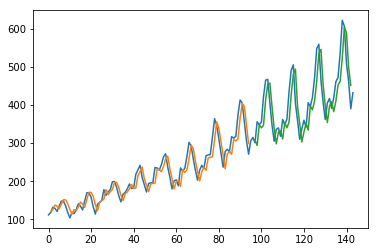

In [39]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [20]:
trainPredictPlot.shape

(144, 1)